# CS131-8L BM2 PARAGUAY 1Q2223
## GROUP MEMBERS
- CORTEZ, MARK MOISES T.
- GENETA, DANIEL M.
- GIL, CLAIRE FRANCHESKA M.
- PEPITO, ALYSSA MAE M.
- SOLEÑO, KEZIAH ANTONETTE C.
- VELASCO, SADIE CATHERINE E.

### Import Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Understanding

#### Collection of Initial Data

In [ ]:
# Read dataset
df = pd.read_excel("satisfaction_2015.xlsx")
df = df.rename(columns={"satisfaction_v2":"satisfaction"}) # Rename satisfaction_v2 to satisfaction
df.head() # 2.1. - Panda dataframe of the raw dataset

#### Data Description

In [ ]:
# Getting summary statistics
df.describe() # 2.2. describe()

#### Data Exploration

##### Exploring categorical data

In [ ]:
# Code here

##### Exploring numerical data

In [ ]:
# Create column named 'satisfaction_int' where 0 = neutral/dissatisfied and 1 = satisfied
df['satisfaction_int'] = 0
df['satisfaction_int'].loc[df['satisfaction'] == 'satisfied'] = 1

In [51]:
# Get numeric attributes
numeric_features = df.select_dtypes(include=[np.number])

# Correlation
correlation = numeric_features.corr()
print(correlation['satisfaction_int'].sort_values(ascending = False), '\n')

satisfaction_int                     1.000000
Online boarding                      0.501749
Inflight entertainment               0.398234
Seat comfort                         0.348829
On-board service                     0.322205
Leg room service                     0.312424
Cleanliness                          0.307035
Inflight wifi service                0.283460
Baggage handling                     0.248680
Inflight service                     0.244918
Checkin service                      0.237252
Food and drink                       0.211340
Ease of Online booking               0.168877
Departure Delay in Minutes          -0.050740
Departure/Arrival time convenient   -0.054270
Arrival Delay in Minutes            -0.058275
Name: satisfaction_int, dtype: float64 



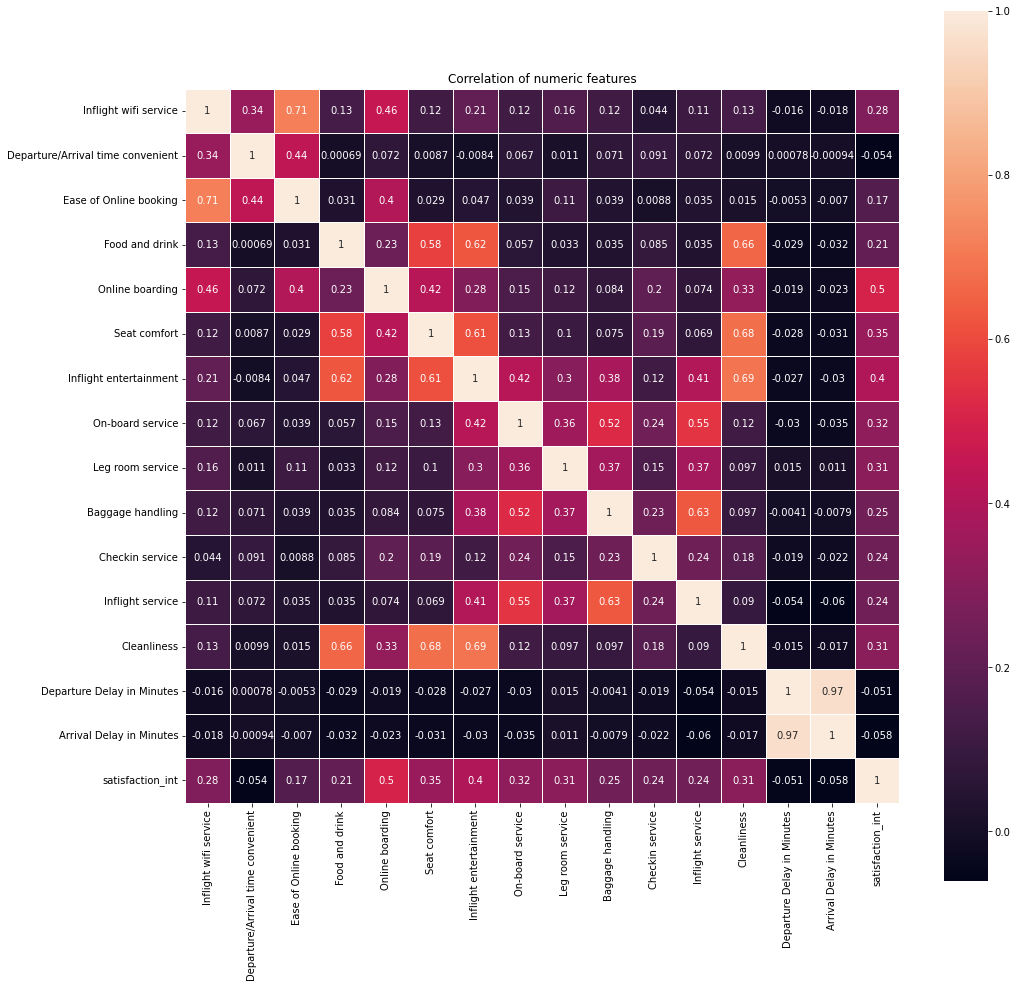

In [74]:
# Correlation heatmap
plt.figure(figsize=(16,16))
plt.title('Correlation of numeric features')
sns.heatmap(correlation, square=True, linewidths=0.8, annot=True, annot_kws={"size":10})
plt.show()

#### Data Quality Verification

In [ ]:
# Prints dataframe information
df.info() # 2.4. info()

In [ ]:
# Getting sum of null values in the dataframe
df.isna().sum() # 2.4. sum of isna()

### Data Preparation

#### Data Selection

In [ ]:
# Remove unneeded fields (i.e., id, gender, customer type, age, type of travel, flight distance, gate location)
df.drop(columns=['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Gate location'], axis=1, inplace=True)
df # 3.1. dataset w/ dropped columns

#### Data Cleaning

In [ ]:
# Code for data cleaning

### Objective 1: Ranking of passenger satisfication based on travel class

In [ ]:
obj1_df = df[["Class", "satisfaction"]] # Get only the Class and satisfaction column from the original datagrame # Up for change
obj1_grby = obj1_df.groupby(["Class", "satisfaction"]).size().reset_index(name='Counts') # Group dataframe by class Class and satisfaction
obj1_grby

In [ ]:
# Plot obj1_grpy using grouped bar chart
obj1_grby.pivot(index="Class", columns="satisfaction", values="Counts").plot(kind="bar")
plt.title('Customer satisfaction by flight class')
plt.xlabel('Class')
plt.ylabel('Counts')
plt.legend()
plt.show()